# Exploración proyecto wumpus y lógica proposicional

**Notas sobre el nb8**
> *"Vamos a ignorar por el momento el hecho de que la casilla sería segura incluso habiendo hedor, porque el Wumpus podría no estar vivo."* Esto es, considerar la casilla del wumpus segura cuando el monstruo esta sin vida. 
- Agregar a la base de conocimiento este evento.

> Sobre la función `casilla_segura` del nb8:
- inlcuir `truncar` en `fluentes_mapa_mental`

> el programa a mejorar es `programaKB`

## Recreando el ambiente de tarea

In [1]:
# define rutas de trabajo e importa ambiente de trabajo
import os
import sys

CURRENT_PATH = os.getcwd()
NOTEBOOKS_PATH = os.path.join(CURRENT_PATH, os.path.pardir, 'notebooks')
PYTHON_PATH = os.path.join(CURRENT_PATH, os.path.pardir, 'python')
sys.path.append(PYTHON_PATH)

from logica import *
from entornos import *
from agentes import *
from wumpus_kb import * 

[None, 'brisa', None, None, None]


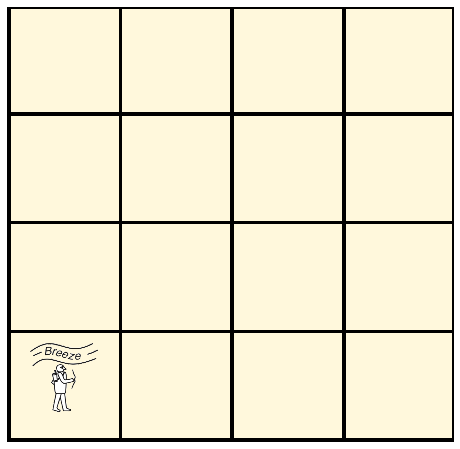

In [19]:
# inicia el ambiente

W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(1,0), (3,1)])
W.pintar_casilla()
agente = Agente()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

[None, None, 'brillo', None, None]


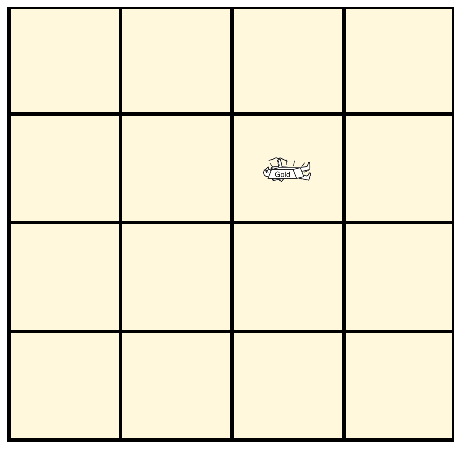

In [20]:
# moviendo el agente 

W.transicion('voltearIzquierda')
W.transicion('adelante')
W.transicion('voltearDerecha')
W.transicion('adelante')
W.transicion('adelante')
W.transicion('voltearIzquierda')
W.transicion('adelante')
W.pintar_casilla()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

## Prueba de flecha y wumpus

['hedor', None, None, None, None]
¡El wumpus ha caido!


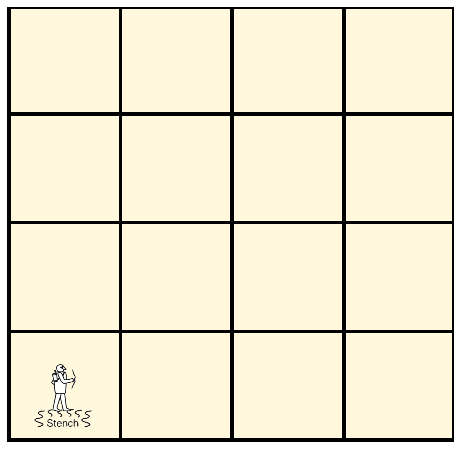

In [21]:
#  dispara e impacta al wumpus

W = Wumpus(wumpus=(1,0), oro=(2,2), pozos=[(2,0), (3,1)])
W.pintar_casilla()
agente = Agente()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

W.transicion('disparar')


['hedor', None, None, None, None]
¡El wumpus ha caido!
¡Juego terminado!
Puntaje: -2


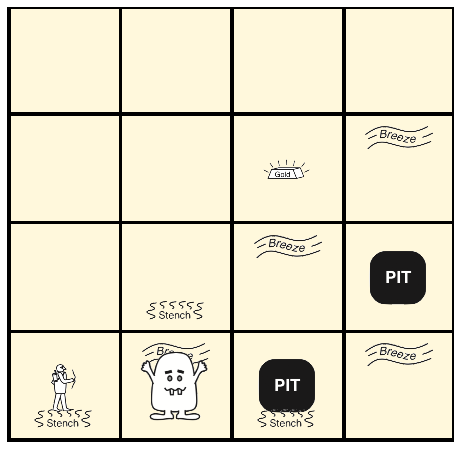

In [23]:
#  dispara, impacta al wumpus y sale de la cueva

W = Wumpus(wumpus=(1,0), oro=(2,2), pozos=[(2,0), (3,1)])
agente = Agente()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

W.transicion('disparar')
W.transicion('salir')

## Mejorando el programa del agente

In [2]:
# define el programa del agente

def programaKB(self, DEB=False):
    acciones = []
    turno, casilla_actual, direccion, cas_seguras, cas_visitadas = self.cache()
    if DEB:
        print('Turno acutal:', turno)
        print('Casilla actual:', casilla_actual)
        print('Dirección actual:', direccion)
        print('Casillas adyacentes seguras:', cas_seguras)
        print('Casillas visitadas:', cas_visitadas)
    if ASK(f'brillo_{turno}','success',self.base):
        if DEB:
            print('¡Oh, el oro!')
        acciones.append('agarrar')
        R = Rejilla(casilla_actual, (0,0), self.todas_seguras())
        camino = best_first_search(R)
        camino = [casilla_actual] + solucion(camino)
        acciones += acciones_camino(camino, direccion)
        acciones.append('salir')
    else:
        opciones = [casilla for casilla in cas_seguras if casilla not in cas_visitadas]
        if DEB:
            print('Casillas opcionales:', opciones)
        if len(opciones) > 0:
            casilla_ir = choice(opciones)
            if DEB:
                print('El agente quiere ir a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        elif len(cas_seguras) > 0:
            casilla_ir = choice(cas_seguras)
            if DEB:
                print('El agente quiere devolverse a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        else:
            print("¡Caso no contemplado!")
    self.acciones += acciones

setattr(Agente, 'programa', programaKB)

In [3]:
# muestra la ejecución hasta finalizar el juego

W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente()

formulas = agente.formulas()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
W.pintar_todo()
plt.show()
sleep(.5) 

for i in range(30):
    a = agente.reaccionar()
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        W.pintar_todo()
        print(W.mensaje)
        break
    agente.estimar_estado(W)
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()
    sleep(.25) 

NameError: name 'formulas' is not defined